In [1]:
import matplotlib.pyplot as plt
from keras.datasets import cifar10

from keras.models import Sequential
from keras.layers import *

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

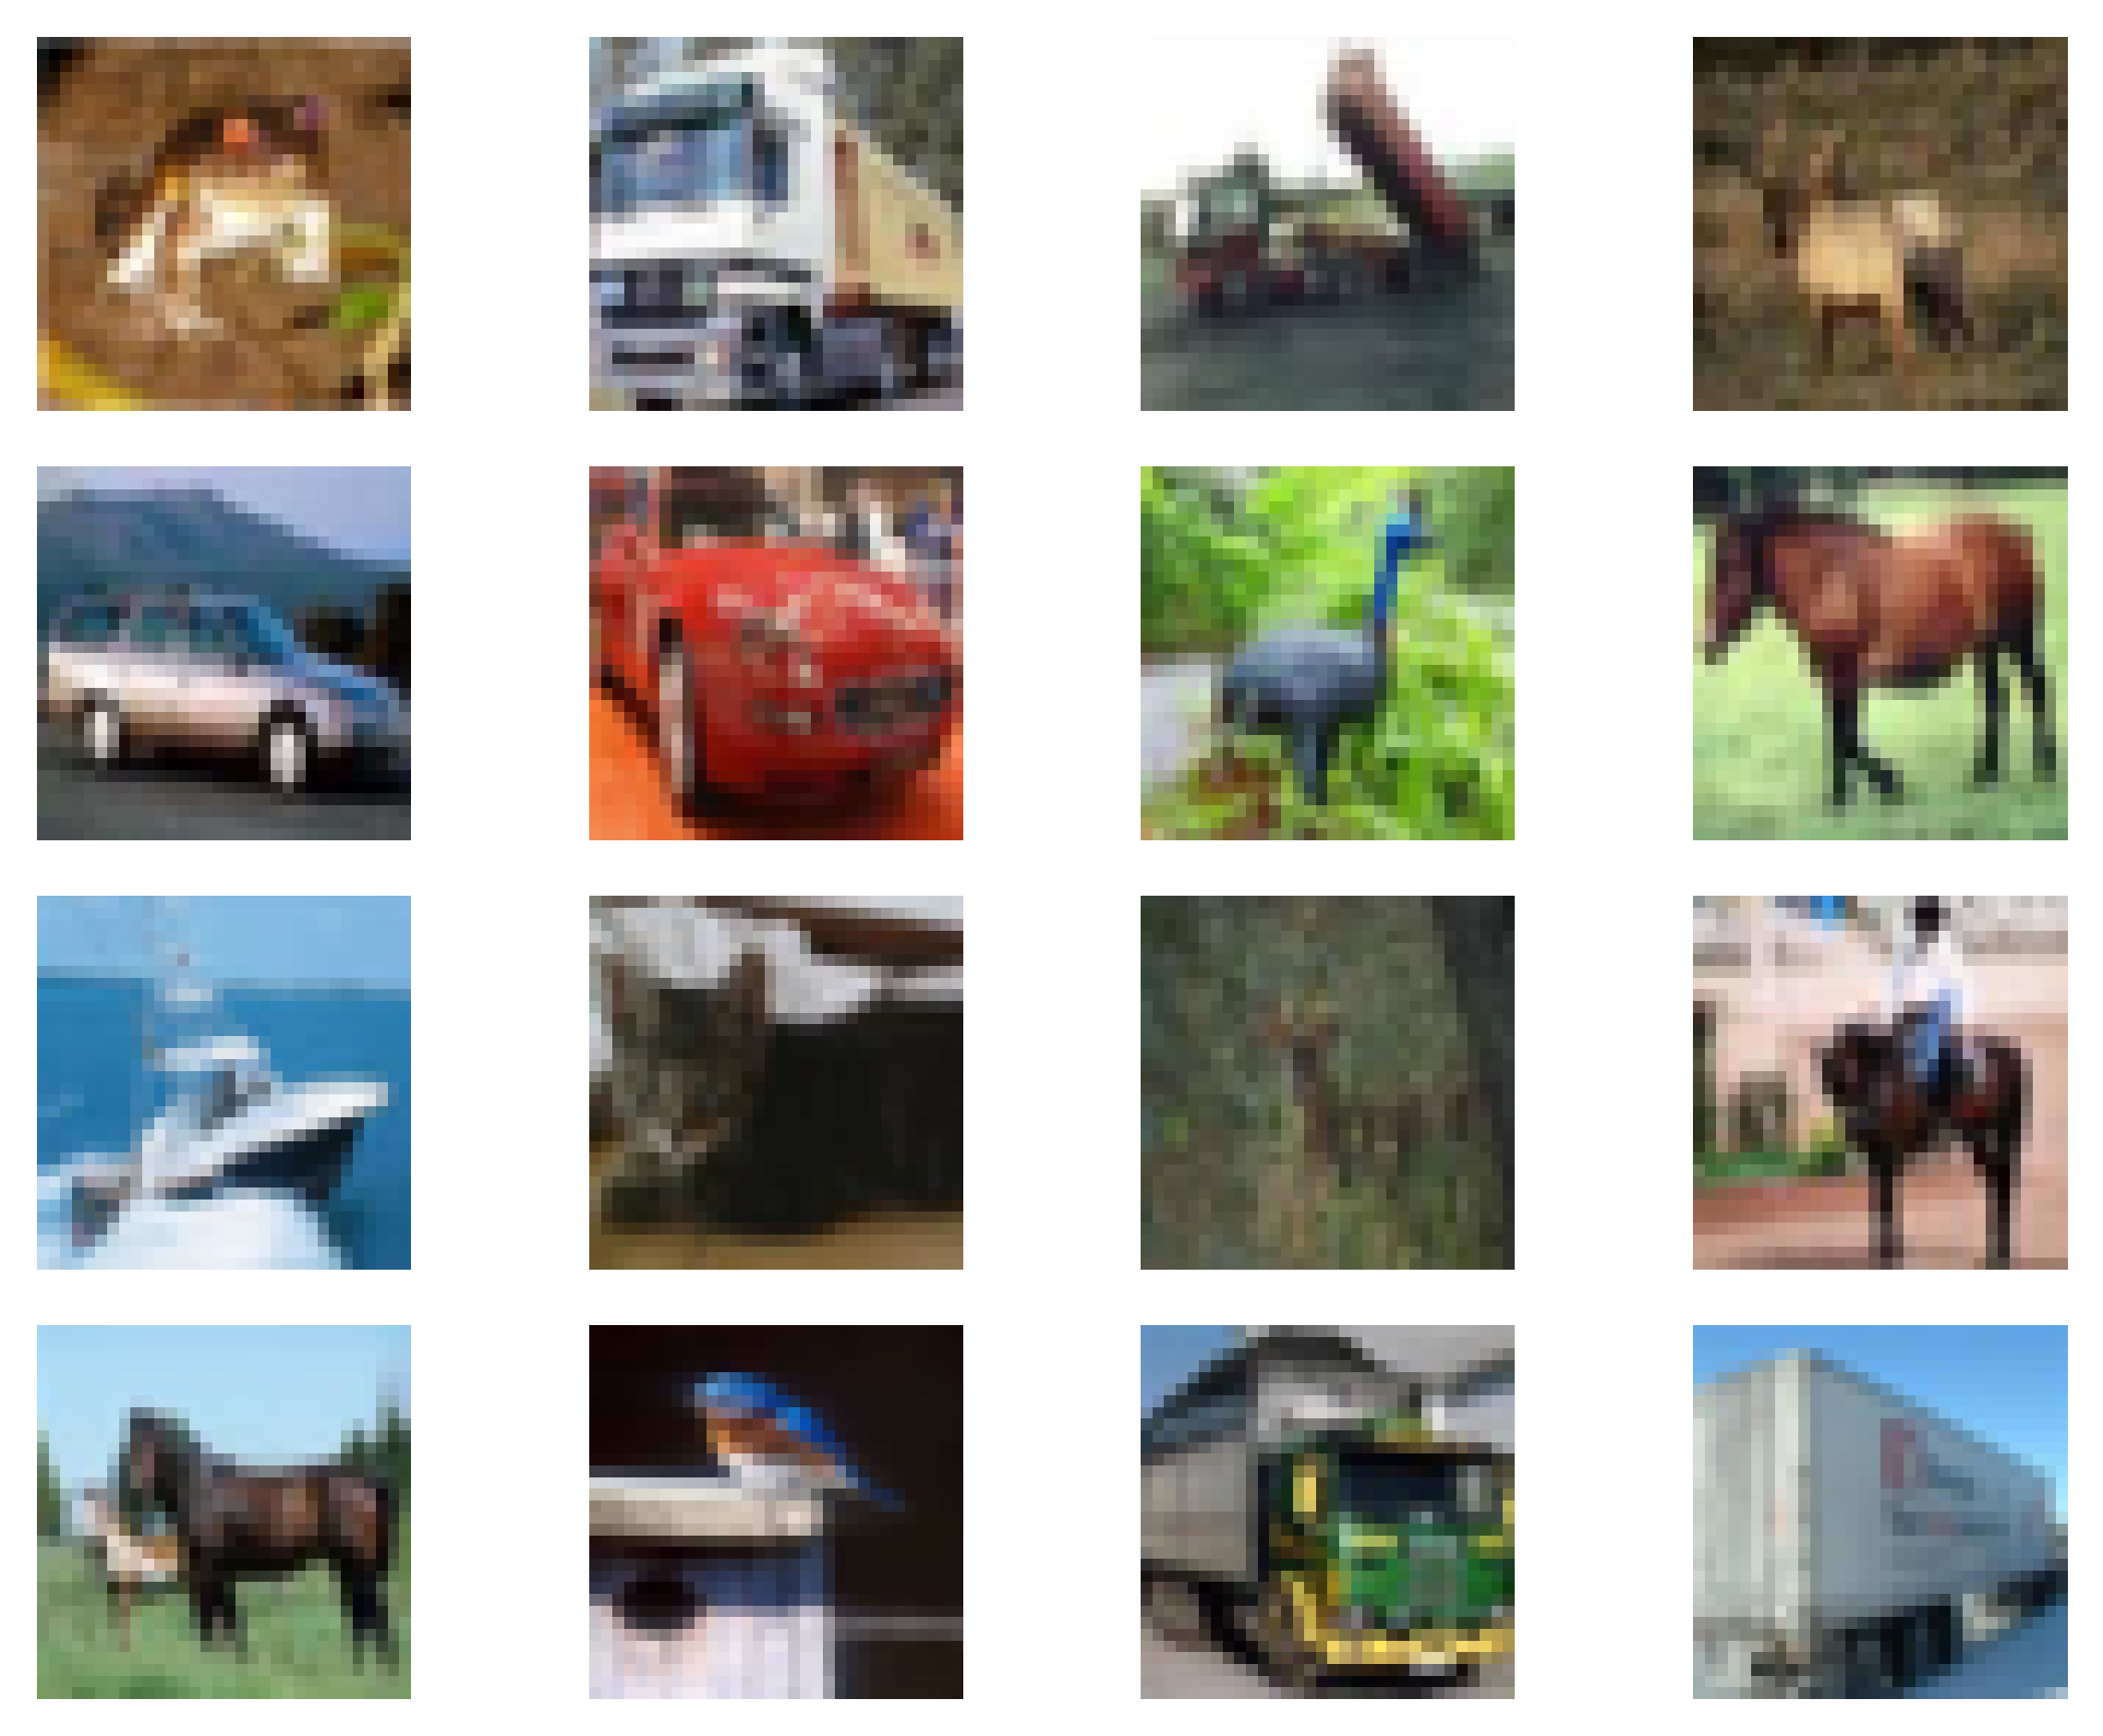

In [3]:
fig, ax = plt.subplots(4, 4,  dpi=400)

k = 0

for i in range(4):
    for j in range(4):
        ax[i][j].imshow(X_train[k], interpolation='nearest')
        ax[i][j].axis('off')
        k += 1

plt.tight_layout()
plt.show()


In [5]:
# Normalization
X_train = X_train / 255.0
X_test = X_test / 255.0

In [6]:
X_train.shape   #(no.sample , high , width, depth(RGB) )

(50000, 32, 32, 3)

In [7]:
model = Sequential()

# input layer
model.add(Conv2D(64, kernel_size=(3, 3), input_shape=X_train.shape[1:]), padding='valid')
# 64 ->  filters or kernal
# hidden layers
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=(2, 2)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, kernel_size=(2, 2)))

model.add(Flatten())                                      # (1)
model.add(Dense(256 , activation = 'relu'))               # (2)

# output layer
model.add(Dense(10, activation='softmax'))   #pred class  # (3)

# 1, 2, 3 fully connected layer


C:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 32)     │         8,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 6, 6, 16)       │         2,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       147,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 162,362 (634.23 KB)

 Trainable params: 162,362 (634.23 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [11]:
hist = model.fit(X_train , y_train , epochs=3 , batch_size=256 , validation_split=0.2)

Epoch 1/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 13s 66ms/step - accuracy: 0.3916 - loss: 1.7076 - val_accuracy: 0.4825 - val_loss: 1.5044
Epoch 2/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 11s 68ms/step - accuracy: 0.5144 - loss: 1.3713 - val_accuracy: 0.5339 - val_loss: 1.3260
Epoch 3/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 64ms/step - accuracy: 0.5778 - loss: 1.2064 - val_accuracy: 0.5845 - val_loss: 1.1852


In [12]:
model.evaluate(X_test , y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5854 - loss: 1.1797


[1.1797139644622803, 0.5853999853134155]

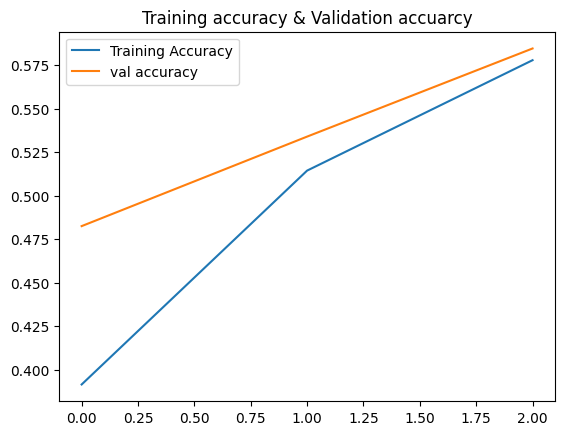

In [13]:
plt.plot(hist.history['accuracy'] , label ='Training Accuracy') # training accuracy
plt.plot(hist.history['val_accuracy'] , label = 'val accuracy') # val accuracy
plt.legend()
plt.title('Training accuracy & Validation accuarcy');

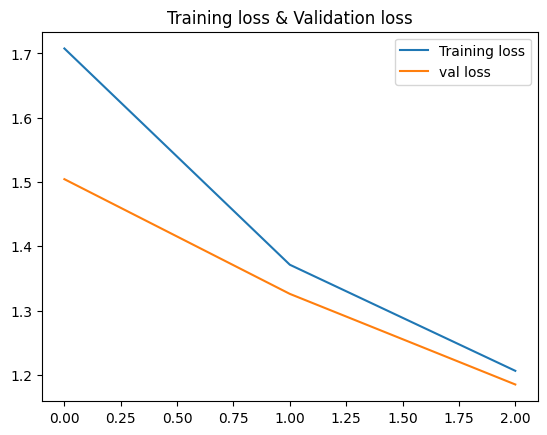

In [14]:
# training loss & validation loss
plt.plot(hist.history['loss'] , label ='Training loss') # training loss
plt.plot(hist.history['val_loss'] , label = 'val loss') # val loss
plt.legend()
plt.title('Training loss & Validation loss');